# Tarea 3. Ocampo García Víctor Emmanuel Miguel Ángel

## Implemenar una red neuronal utilizando Keras

En esta tarea vas a desarrollar una red neuronal utilizando el conjunto de datos Iris. 

En la clase 6 revisamos brevemente este dataset, si aún no tienes claro qué variables son dependientes e independientes puedes revisar la documentación del [dataset](https://archive.ics.uci.edu/ml/datasets/iris). 

La finalidad de esta tarea no es que encuentres el mejor modelo (aunque sería bueno que experimentes y encuentres uno bueno) si no que te familiarices con el uso de [Keras](https://keras.io/) y aprendas a utilizar su documentación.

En cada ejercicio agrega las celdas que necesites.


In [1]:
#pip install numpy==1.20.3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1) #esto lo usamos para fijar el orden aleatorio con el que reordenamos, eventualmente, el dataframe

## I. Preparación de los datos

### Ejercicio 1:

1.1 Carga el [conjunto de datos Iris desde sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)

1.2 Guarda los rasgos del conjunto de datos en la variable X

1.3 Guarda la salida del conjunto de datos en la variable y

Nota: Asegurate de tener instalada la libreria de sklearn

In [3]:
from sklearn import datasets #1.1
iris = datasets.load_iris() 
X = iris.data #1.2
y = iris.target #1.3

### Ejercicio 2

2.1 Verifica que el tipo de dato de X y y es un arreglo

2.2 Convierte los arreglos a dataframes de pandas y concatenalos para tener un dataframe como el siguiente:

| sepal_length | sepal_width | petal_length | petal_width | target |
| --- | --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 | 0 |
| 4.9 | 3.0 | 1.4 | 0.2 | 0 |

Hint: 

Si no sabes cómo convertir un arreglo en dataframe puedes buscar en google algo así: *how to convert numpy array to dataframe pandas*

Puedes generar un dataframe para las X y uno para las y y despues *juntarlos*. Si no sabes cómo hacer esto, puedes buscar una [cheat sheet de pandas](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf). (En particular puedes utilizar merge sobre el indice de los dataframes creados).

In [4]:
print(X.shape) #2.1 aquí comprobamos las dimensiones
print(y.shape)

print(X[0:5]) #visualizamos los primeros 5 elementos del arreglo X

(150, 4)
(150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [5]:
dfX = pd.DataFrame(X, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) #para X

print(type(dfX))
dfX

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
dfy = pd.DataFrame(y, columns = ['target']) #para y

print(type(dfy))
dfy

<class 'pandas.core.frame.DataFrame'>


,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [7]:
df=dfX.merge(dfy, how='left', left_index=True, right_index=True) #los unimos en un nuevo dataframe
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Ejercicio 3

3.1 Los datos estan ordenados de alguna manera?, si es así reordenalos de manera aleatoria. 

3.2 Utiliza el método describe para generar una tabla con información estadística

<font color='gray'>

Aparentemente parecen ordenados por el target. Verifiquemos esto de la siguiente forma:

In [8]:
df1=df.sort_values(by='target', ascending=True) #3.1
df1

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
27,5.2,3.5,1.5,0.2,0
28,5.2,3.4,1.4,0.2,0
29,4.7,3.2,1.6,0.2,0
30,4.8,3.1,1.6,0.2,0
...,...,...,...,...,...
119,6.0,2.2,5.0,1.5,2
120,6.9,3.2,5.7,2.3,2
121,5.6,2.8,4.9,2.0,2
111,6.4,2.7,5.3,1.9,2


<font color='gray'>

Al comparar el orden de los ínidces entre ambos dataframes, vemos que no es cierto. Sin embargo, reordenaremos los registros por si hay algún patrón más sofisticado.

In [9]:
df=df.sample(frac=1)#.reset_index(drop=True) #también re-establece los índices
df

,sepal_length,sepal_width,petal_length,petal_width,target
14,5.8,4.0,1.2,0.2,0
98,5.1,2.5,3.0,1.1,1
75,6.6,3.0,4.4,1.4,1
16,5.4,3.9,1.3,0.4,0
131,7.9,3.8,6.4,2.0,2
...,...,...,...,...,...
133,6.3,2.8,5.1,1.5,2
137,6.4,3.1,5.5,1.8,2
72,6.3,2.5,4.9,1.5,1
140,6.7,3.1,5.6,2.4,2


In [10]:
df.describe() #3.2

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Ejercicio 4

Realiza los histogramas de cada variable en el dataframe

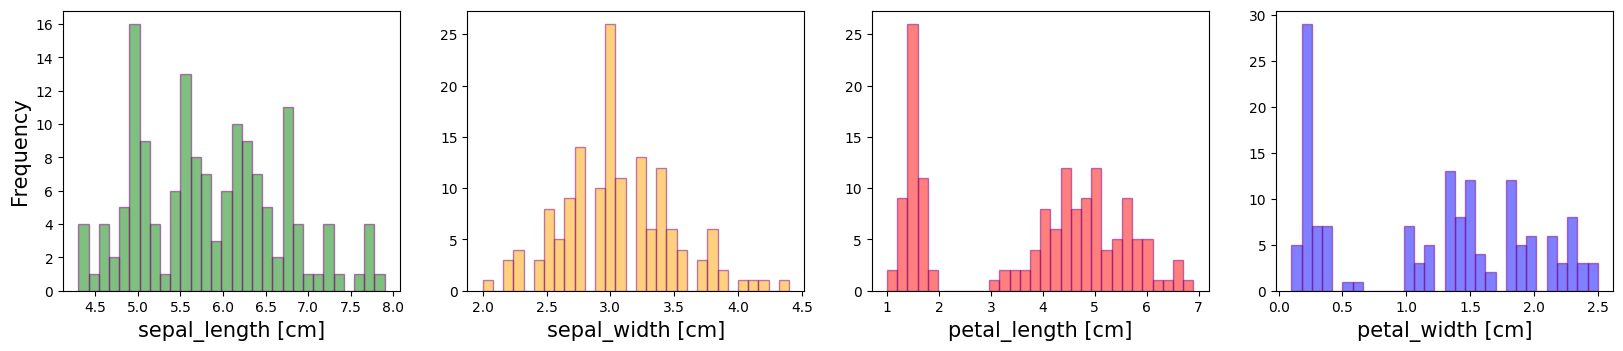

In [11]:
plt.figure(figsize=(20,8)) #para los rasgos

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.sepal_length, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('sepal_length [cm]', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.sepal_width, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('sepal_width [cm]', size=15)

ax3.hist(df.petal_length, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('petal_length [cm]', size=15)

ax4.hist(df.petal_width, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('petal_width [cm]', size=15);

Text(0.5, 0, 'Iris class')

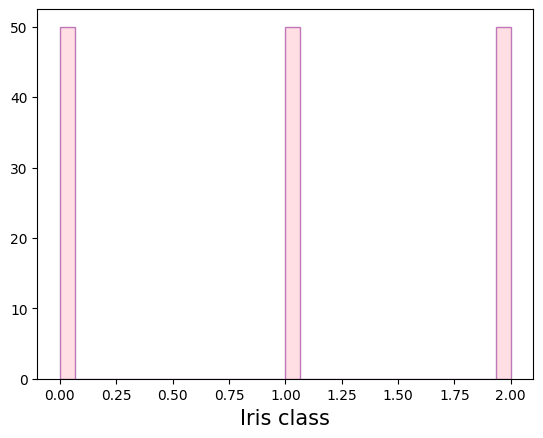

In [12]:
plt.hist(df.target, bins=30, color='pink',edgecolor='purple', alpha=0.5) #para el target
plt.xlabel('Iris class', size=15)

### Ejercicio 5 

5.1 Separa el conjunto de datos en los conjuntos de entrenamiento (90%) y de prueba (10%). Muestra cuántas muestras tiene cada conjunto

5.2 Separa las variables independientes de las variables dependientes para el conjunto de prueba y el conjunto de entrenamiento. Revisa las dimensiones de cada conjunto

5.3 Normaliza los datos de entrenamiento y prueba (solo normaliza a las variables independientes)


In [13]:
test_ratio = 0.1 #5.1

train_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

df_train = df.iloc[0:train_ratio,:]
df_test  = df.iloc[train_ratio:,:]

print(df_train.shape)
print(df_test.shape)

(135, 5)
(15, 5)


In [14]:
train_x = df_train.values[:,:-1] #5.2 se hace la separación de todos los registros
train_y = df_train.values[:,-1:]

test_x = df_test.values[:,:-1]
test_y = df_test.values[:,-1:]

In [15]:
df_train_x = pd.DataFrame(train_x, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) #5.3
#lo convertimos en dataframe para poder manipular

In [16]:
mu = df_train_x.mean() #normalizamos
sigma = df_train_x.std()
df_train_x_norm = (df_train_x - mu)/ sigma
df_train_x_norm.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.023709,2.097366,-1.401565,-1.278809
1,-0.853514,-1.303087,-0.395419,-0.117559
2,0.924641,-0.169603,0.387138,0.269525
3,-0.497883,1.870669,-1.345668,-1.020753
4,2.465708,1.643972,1.505078,1.043691


In [17]:
train_x_norm = df_train_x_norm.values[:,:] #extraemos los datos del dataframe

In [18]:
df_test_x = pd.DataFrame(test_x, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) 
#repetimos para los datos de prueba

mu = df_test_x.mean() #normalizamos
sigma = df_test_x.std()
df_test_x_norm = (df_test_x - mu)/ sigma
df_test_x_norm.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.536281,-1.231682e-15,-0.008820,0.040770
1,0.222607,-1.941451e+00,0.189620,0.346547
2,1.436827,8.320503e-01,0.321913,0.193659
3,-0.384503,-5.547002e-01,0.586499,0.958101
4,-0.991613,1.386750e+00,-1.662483,-1.641003


In [19]:
test_x_norm = df_test_x_norm.values #extraemos los datos del dataframe

## II. Implementación de la red neuronal

In [20]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers

In [21]:
import tensorflow as tf

### Ejercicio 7

Implementa una red neuronal con dos capas ocultas. Completa la función **architecture** que define la arquitectura.

Cúantos nodos debe tener la capa de entrada?

Cuántos valores posibles puede tomar la variable **target**? Esto define el número de clases que tienes, y por lo tanto, el número de nodos en la capa de salida

En este caso vamos a realizar una clasificación (veremos a detalle esto en las siguientes clases) porque tenemos un target categorico, por lo que la última capa debe tener tantos nodos como salidas o clases.

Nota: si crees que el modelo funciona mejor con más o menos capas, modifica la función para agregar las capas que desees.

In [22]:
def architecture(n_hidden1, n_hidden2, initializer, activation, input_shape, classes):
    
    model = Sequential()
        
    model.add(Dense(units=n_hidden1,                 #units da el número de nodos 
                    kernel_initializer=initializer, # Initiallizacion de los pesos W
                    bias_initializer='zeros',       # Inicialización del bias
                    activation=activation,          # Función de activación
                    input_shape=input_shape))       # Da el numero de nodos de la capa de entrada.
                                                    # Este número corresponde al número de rasgos X que definen
                                                    # al sistema de estudio
     
    model.add(Dense(units=n_hidden2,
                    kernel_initializer=initializer,
                    bias_initializer='zeros',
                    activation =activation))  
    
    model.add(Dense(units=classes,
                    kernel_initializer=initializer,
                    bias_initializer='zeros',
                    activation ='softmax'))
    
    return model

<font color='gray'>

La capa de entrada debe tener 4 nodos (número de rasgos).

La variable target toma 3 valores (1, 2, 3).

### Ejercicio 8

8.1 Llama a la función architecture para definir el modelo que vas a entrenar

8.2 Utiliza el metodo plot_model para visualizar un diagrama del modelo que definiste

8.3 Cuántos parametros (w y b) tiene el modelo que definiste (puedes calcularlo a mano o utilizar el método summary)

In [23]:
input_shape = (4,) #8.1
n_hidden1 = 4
n_hidden2 = 3
classes = 3
initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=0.1)
#initializer="uniform"
#initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
activation = 'tanh'

model_keras = architecture(n_hidden1, n_hidden2, initializer, activation, input_shape, classes)

In [24]:
plot_model(model_keras, to_file='model.png', show_shapes=True, rankdir='TB', 
      expand_nested=True, show_layer_names=True, dpi=96) #8.2

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [25]:
model_keras.summary() #8.3

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


### Ejercicio 9

9.1 Compila el modelo que definiste utilizando la función de costo y [métrica](https://keras.io/api/metrics/probabilistic_metrics/) [SparseCategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/) 

Para el optimizador puedes probar algunos de los que se indican [aquí](https://keras.io/api/optimizers/), quedate con el que te dé mejor resultados.

In [26]:
optimizer = tf.keras.optimizers.Nadam() 
loss = tf.keras.losses.SparseCategoricalCrossentropy()
acc = tf.keras.metrics.SparseCategoricalCrossentropy()

model_keras.compile(loss=loss, 
              optimizer=optimizer,
              metrics=[acc])

### Ejercicio 10

9.1 Entrena el modelo utilizando el método fit()

9.2 Grafica el costo de entrenamiento y de validación con respecto a la época.

9.3 Grafica el accuracy de entrenamiento y de validación con respecto a la época.

Hint: revisa la salida del entrenamiento *history_model.history* 

In [27]:
import time

In [28]:
epochs = 200 #9.1
start_time = time.time()
val_split=0.1

history_model = model_keras.fit(train_x_norm, train_y,
                          epochs=epochs,
                          batch_size=32,
                          validation_split=val_split, 
                          shuffle=True,
                          verbose=2)

end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

Epoch 1/200
4/4 - 2s - loss: 1.0976 - sparse_categorical_crossentropy: 1.0976 - val_loss: 1.0979 - val_sparse_categorical_crossentropy: 1.0979
Epoch 2/200
4/4 - 0s - loss: 1.0972 - sparse_categorical_crossentropy: 1.0972 - val_loss: 1.0979 - val_sparse_categorical_crossentropy: 1.0979
Epoch 3/200
4/4 - 0s - loss: 1.0967 - sparse_categorical_crossentropy: 1.0967 - val_loss: 1.0979 - val_sparse_categorical_crossentropy: 1.0979
Epoch 4/200
4/4 - 0s - loss: 1.0960 - sparse_categorical_crossentropy: 1.0960 - val_loss: 1.0978 - val_sparse_categorical_crossentropy: 1.0978
Epoch 5/200
4/4 - 0s - loss: 1.0950 - sparse_categorical_crossentropy: 1.0950 - val_loss: 1.0977 - val_sparse_categorical_crossentropy: 1.0977
Epoch 6/200
4/4 - 0s - loss: 1.0939 - sparse_categorical_crossentropy: 1.0939 - val_loss: 1.0973 - val_sparse_categorical_crossentropy: 1.0973
Epoch 7/200
4/4 - 0s - loss: 1.0922 - sparse_categorical_crossentropy: 1.0922 - val_loss: 1.0965 - val_sparse_categorical_crossentropy: 1.0965

Epoch 58/200
4/4 - 0s - loss: 0.6541 - sparse_categorical_crossentropy: 0.6541 - val_loss: 0.6926 - val_sparse_categorical_crossentropy: 0.6926
Epoch 59/200
4/4 - 0s - loss: 0.6493 - sparse_categorical_crossentropy: 0.6493 - val_loss: 0.6872 - val_sparse_categorical_crossentropy: 0.6872
Epoch 60/200
4/4 - 0s - loss: 0.6448 - sparse_categorical_crossentropy: 0.6448 - val_loss: 0.6817 - val_sparse_categorical_crossentropy: 0.6817
Epoch 61/200
4/4 - 0s - loss: 0.6402 - sparse_categorical_crossentropy: 0.6402 - val_loss: 0.6765 - val_sparse_categorical_crossentropy: 0.6765
Epoch 62/200
4/4 - 0s - loss: 0.6359 - sparse_categorical_crossentropy: 0.6359 - val_loss: 0.6715 - val_sparse_categorical_crossentropy: 0.6715
Epoch 63/200
4/4 - 0s - loss: 0.6319 - sparse_categorical_crossentropy: 0.6319 - val_loss: 0.6666 - val_sparse_categorical_crossentropy: 0.6666
Epoch 64/200
4/4 - 0s - loss: 0.6278 - sparse_categorical_crossentropy: 0.6278 - val_loss: 0.6616 - val_sparse_categorical_crossentropy:

Epoch 115/200
4/4 - 0s - loss: 0.5274 - sparse_categorical_crossentropy: 0.5274 - val_loss: 0.5337 - val_sparse_categorical_crossentropy: 0.5337
Epoch 116/200
4/4 - 0s - loss: 0.5265 - sparse_categorical_crossentropy: 0.5265 - val_loss: 0.5327 - val_sparse_categorical_crossentropy: 0.5327
Epoch 117/200
4/4 - 0s - loss: 0.5255 - sparse_categorical_crossentropy: 0.5255 - val_loss: 0.5315 - val_sparse_categorical_crossentropy: 0.5315
Epoch 118/200
4/4 - 0s - loss: 0.5247 - sparse_categorical_crossentropy: 0.5247 - val_loss: 0.5302 - val_sparse_categorical_crossentropy: 0.5302
Epoch 119/200
4/4 - 0s - loss: 0.5238 - sparse_categorical_crossentropy: 0.5238 - val_loss: 0.5289 - val_sparse_categorical_crossentropy: 0.5289
Epoch 120/200
4/4 - 0s - loss: 0.5229 - sparse_categorical_crossentropy: 0.5229 - val_loss: 0.5277 - val_sparse_categorical_crossentropy: 0.5277
Epoch 121/200
4/4 - 0s - loss: 0.5221 - sparse_categorical_crossentropy: 0.5221 - val_loss: 0.5264 - val_sparse_categorical_crosse

Epoch 172/200
4/4 - 0s - loss: 0.4943 - sparse_categorical_crossentropy: 0.4943 - val_loss: 0.4897 - val_sparse_categorical_crossentropy: 0.4897
Epoch 173/200
4/4 - 0s - loss: 0.4939 - sparse_categorical_crossentropy: 0.4939 - val_loss: 0.4894 - val_sparse_categorical_crossentropy: 0.4894
Epoch 174/200
4/4 - 0s - loss: 0.4935 - sparse_categorical_crossentropy: 0.4935 - val_loss: 0.4889 - val_sparse_categorical_crossentropy: 0.4889
Epoch 175/200
4/4 - 0s - loss: 0.4931 - sparse_categorical_crossentropy: 0.4931 - val_loss: 0.4885 - val_sparse_categorical_crossentropy: 0.4885
Epoch 176/200
4/4 - 0s - loss: 0.4927 - sparse_categorical_crossentropy: 0.4927 - val_loss: 0.4881 - val_sparse_categorical_crossentropy: 0.4881
Epoch 177/200
4/4 - 0s - loss: 0.4924 - sparse_categorical_crossentropy: 0.4924 - val_loss: 0.4875 - val_sparse_categorical_crossentropy: 0.4875
Epoch 178/200
4/4 - 0s - loss: 0.4921 - sparse_categorical_crossentropy: 0.4921 - val_loss: 0.4869 - val_sparse_categorical_crosse

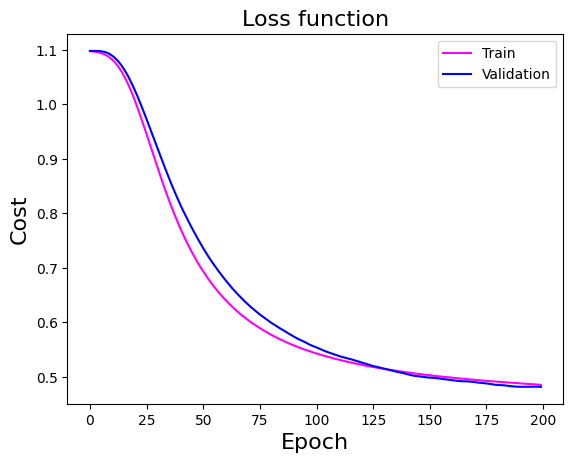

In [29]:
plt.plot(history_model.history['loss'], 'magenta') #9.2
plt.plot(history_model.history['val_loss'], 'blue')
plt.title('Loss function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right');

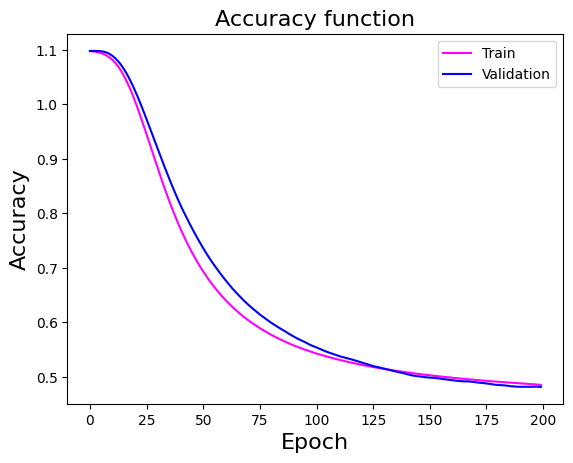

In [74]:
plt.plot(history_model.history['sparse_categorical_crossentropy'], 'magenta') #9.3
plt.plot(history_model.history['val_sparse_categorical_crossentropy'], 'blue')
plt.title('Accuracy function', size=16)
plt.ylabel('Accuracy', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right');

### Ejercicio 11

Evalúa tu modelo utilizando los datos de prueba y el método evaluate()

In [31]:
scores = model_keras.evaluate(test_x_norm, test_y)
print('Test loss:', scores[0])

1/1 [==============================] - 0s 16ms/step - loss: 0.6150 - sparse_categorical_crossentropy: 0.6150
Test loss: 0.6150427460670471
